-----------------------
# Random Variables

Khan Academy:
https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library

---------------------

Random variables are ways to map outcomes of random processed to numbers. Usually random variables are noted by capital letters, e.g. **X**.  

* **Discrete Random Variable** - Take distinct/separate values
* **Continuous Random Variables** - Take any value in interval

**Example - Discrete Random Variable**. Let's say we want to estimate the number of people we will see in the line in store. We conduct an experiment by visiting the store 50 times. Out of the 50 times we observe 0 people 24 times, 1 person 18 times, and 2 people 8 times. We estimate the probabilities as shown below.

| People in the line | Times Observed | Probability Estimate |
| :------------------ | :-------------- | :-----------------:
| 0 | 24 | $\frac{24}{24+18+8}=\frac{24}{50}$ = 0.48 = 48% |
| 1 | 18 | $\frac{18}{50}$ = 0.36 = 36% |
| 2 | 8 | $\frac{8}{50}$ = 0.16 = 16% |

Now, let's say we plan to visit the store 500 times in the coming two years. How many times do we expect to see a 2 people line? A reasonable expectiation would be

\begin{equation*}
500 \cdot \frac{8}{50} = 80
\end{equation*}



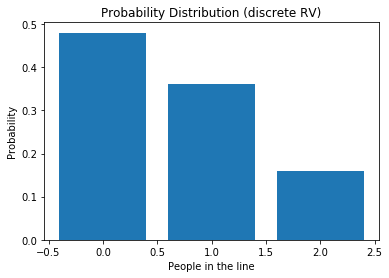

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

_= plt.bar([0,1,2], [0.48, 0.36, 0.16])
_= plt.xlabel('People in the line')
_= plt.ylabel('Probability')
_= plt.title('Probability Distribution (discrete RV)')

**Example - Continuous Random Variable**. The probability of exact height of a randomly selected student from your school. Exact height means we are not rounding the numbers. But we don't even have a way to measure the exact height. That's a continuous random variable.  

* For continuous random variables the probability of observing one exact number is not possible, so $P(X = x) = 0$. That's why, the probability of a continuous random variable is rather $P(|X-x|<\epsilon)$, where $\epsilon$ is a very small number. And it's equal to the erea under the curve as shown below.

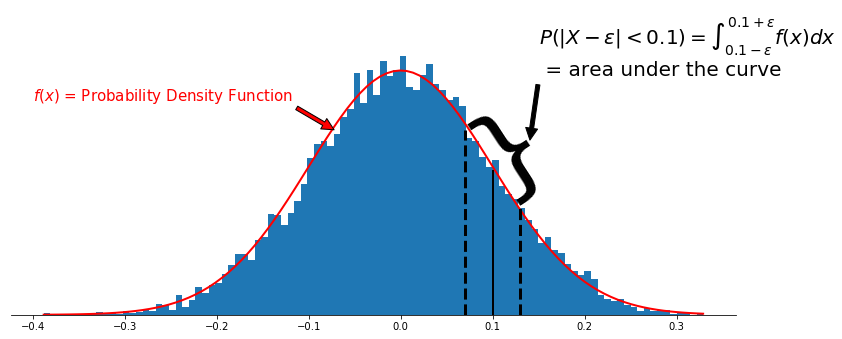

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## simulate random normals
np.random.seed(1234)
mu, sigma = 0, 0.1
nums = np.random.normal(mu, sigma, 10000)

# plot the distribution
plt.figure(figsize=(13,5))
count, bins, ignored = plt.hist(nums, bins=100, normed=True)
_= plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
            linewidth=2, color='r')

## add vertical lines
epsilon = 0.03
_= plt.axvline(0.1, ymax=0.53, linewidth=2, color='black')
_= plt.axvline(0.1+epsilon, ymax=0.4, linewidth=3, color='black', linestyle='--')
_= plt.axvline(0.1-epsilon, ymax=0.68, linewidth=3, color='black', linestyle='--')

## add the probability formula and arrow
_= plt.annotate('$P(|X-\epsilon|<0.1) = \int_{0.1-\epsilon}^{0.1+\epsilon}f(x)dx$\n = area under the curve',
                xy=(0.14, 2.8), xytext=(0.15, 4),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)
## add curly brackets
_= plt.text(0.06, 2.18, '$\}$', fontsize=106, rotation=33)

## add f(x) and arrow
_= plt.annotate('$f(x)$ = Probability Density Function', xy=(-0.07, 3), xytext=(-0.4, 3.5),
                arrowprops=dict(facecolor='r', shrink=0.05), fontsize=15, color='r')

## remove the top, left, and right axis
_= plt.gca().spines['top'].set_visible(False)
_= plt.gca().spines['left'].set_visible(False)
_= plt.gca().spines['right'].set_visible(False)
_= plt.gca().yaxis.set_major_locator(plt.NullLocator()) 

-----------------------------------
### Mean and Variance

Let's say we have a discrete random variable X which is equal to the number of workouts in a week.

 | X | P(X)
 | - | - 
 | 0 | 0.1
 | 1 | 0.15
 | 2 | 0.4
 | 3 | 0.25
 | 4 | 0.1
 
**Expected value/Mean**. The expected value of $X$ is  


\begin{equation*}
E(X) = \mu_x = 0\cdot0.1 + 1\cdot0.15 + 2\cdot0.4 + 3\cdot0.25 + 4\cdot0.1 = 2.1 
\end{equation*}

So the expected number of workouts in a week is 2.1.
 
**Variance and Standard Deviation**. Variance is a measure of spread.  

*Variance*  

\begin{equation*}
Var(X) = (0-2.1)^2\cdot0.1 + (1-2.1)^2\cdot0.15 + (2-2.1)^2\cdot0.4 + (3-2.1)^2\cdot0.25 + (4-2.1)^2\cdot0.1 = 1.19
\end{equation*}  

*Standard Deviation*  

\begin{equation*}
\sigma_x = \sqrt{Var(X)} = \sqrt{1.19} \approx 1.09
\end{equation*}

------------------------------------
### The sum and difference of two random variables

If $X$ and $Y$ are indipendent random variables, than 

$$\boxed{
\begin{align*}
E(X + Y) &= E(X) + E(Y)\\
E(X - Y) &= E(X) - E(Y) \\
Var(X \pm Y) &= Var(X) + Var(Y)
\end{align*}
}
$$
--------------------------------

**Deriving variance of the difference of random variables**  

\begin{align*}
Var(X-Y)&=E[(X-Y-E(X-Y))^2]\\
        &=E[((X-E(X))-(Y-E(Y))^2]\\
        &=E[(X-E(X))^2-2\cdot(X-E(X))\cdot(Y-E(Y))+E(Y-E(Y))^2]\\
        &=E[(X-E(X))^2]-E[2\cdot(X-E(X))\cdot(Y-E(Y))]+E[(Y-E(Y))^2]\\
        &=Var(X)-0+Var(Y)\\
        &=Var(X)+Var(Y)
\end{align*}

-----------------------------------
## Binomial Variables

* Made up of independent trials
* Each trial has one of two discrete outcomes (either success or failure)
* Fixed number of trials
* Probability of success on each trial is constant

**Example - Binomial**. Number of heads after 10 flips of a coin.  
**Example - not a Binomial**. Number of kings after taking 2 cards from standard deck **without** replacement (the taking of the second card is dependent of the first card).  
**Example - Binomial**. Number of kings after taking 2 cards from standard deck **with** replacement.

______________________________________________

### **10% Rule of Assuming "Independence" ** 

If our sample is less than or equal to the 10% of the population, it is ok to assume an approximate independence.

_____________________________________________

### Binomial Probability Formula

If $X$ is a Binomial Random Variable with a probability of success equal to $p$, then the probability of $k$ successes out of $n$ trials is

\begin{align*}
\boxed{
\begin{equation*}
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}
\end{equation*}
}
\end{align*}
---------------------------------------


where $\binom{n}{k}$ is read "n choose k" and denotes the number of k-combinations of n elements without repetition.

\begin{equation*}
\binom{n}{k} = \frac{n!}{k!\cdot(n-k)!}
\end{equation*}

--------------------------------------------------------
### Expected Value and Variance of Bernoulli Distribution

* Bernoulli distribution is the simplest case of Binomial distribution when there is **only 1 trial**.  
* If the probability of success (1) is $p$, and the probability of the failure (0) is $1-p$, then the expected value, mean, and the variance of a Bernoulli random variable are

\begin{align*}
\mu &= (1-p)\cdot0 + p\cdot1 \\
    &= p
\end{align*}

\begin{align*}
\sigma^2 &= (1-p)\cdot(0-\mu)^2+p\cdot(1-\mu)^2 \\
         &= (1-p)\cdot(0-p)^2+p\cdot(1-p)^2 \\
         &= (1-p)\cdot p^2+p\cdot(1-2p+p^2) \\
         &= p - p^2 \\
         &= p(1-p)
\end{align*}

--------------------------------------------------------
### Expected Value and Variance of Binomial Distribution

If we have a Binomial random variable, $X$, with a probability of success equal to $p$ and n trials, then the **expected value of $X$** is

$$\boxed{
\begin{align*}
E(X) &= np\\
Var(X) &= np(1-p)
\end{align*}
}$$
------------------


**Explanation**. $X$ consists of $n$ independent Bernoulli random variables, $X_1, X_2, ..., X_n$, each of which has a probability of success equal to $p$ then

\begin{align*}
E(X) &= E(X_1 + X_2 + ... +X_n) \\
     &= E(X_1) + E(X_2) + ... + E(X_n) \\
     &= p + p + ... + p\\
     &= np
\end{align*}

\begin{align*}
Var(X) &= Var(X_1 + X_2 + ... + X_n)\\
       &= Var(X_1) + Var(X_2) + ... + Var(X_n)\\
       &= np(1-p)
\end{align*}

---------------------------------------
## Geometric Random Variable

* Made up of independent trials
* Each trial has one of two discrete outcomes (either success or failure)
* Probability of success on each trial is constant
* **Number of trials is not defined. How many trials will there be until the success?**

**Example**. Number of trials until a head occurs.

---------------------------------------
### Cumulative Geometric Probability (more than a value)

* $V$ is a geometric random variable - the number of vehicles Emillia registers each day until she first registers an SUV. 
* The probability of success for each trial is equal to $p$ - SUV cars make up $p\cdot 100$ percent of the vehicles Emillia registers each day.
* What is the probability that the success will happen after the $k$ trials - Emillia will register k vehicles before she registers an SUV?

\begin{align*}
\boxed{P(V > k)} &= P(V=k+1) + P(V=k+2) + ...\\
                 &= P(first k trials fail)\\
                 &\boxed{= (1-p)^k}
\end{align*}

---------------------------------------
### Cumulative Geometric Probability (less than a value)

\begin{align*}
P(V < k) &= P(V=1) + P(V=2) + ... + P(V=k-1)\\
         &= p +p\cdot (1-p) + ... + p \cdot (1-p)^{k-2}\\
\end{align*}

Or an easyer way

\begin{align*}
\boxed{P(V < k)} &= P(V \leq k-1)\\
                 &= 1 - P(V > k-1) \\
                 &\boxed{= 1 - (1-p)^{k-1}}
\end{align*}

---------------------------------------
### Expected Value of Geometric Random Variable

Let's say we have a Geometric Random Variable, $X$. $X$ is a number of independent trials to get "success", where P(success) for each trial is $p$.

\begin{align*}
\boxed{E(X) = \frac{1}{p}}
\end{align*}
---------------------------

\begin{align*}
E(X) &= P(X=1)\cdot 1 + P(X=2)\cdot 2 + P(X=3)\cdot 3 + ...\\
E(X) &= 1p + 2p(1-p) + 3p(1-p)^2 + ... \\
(1-p)E(X) &= \quad\quad 1p(1-p) + 2p(1-p)^2 + 3p(1-p)^3 + ... \\
E(X) - (1-p)E(X) &= 1p + 1p(1-p) + 1p(1-p)^2 + ...\\
E(X) + (p-1)E(X) &= 1p + 1p(1-p) + 1p(1-p)^2 + ...\\
pE(X) &= p + p(1-p) + p(1-p)^2 + ...\\
E(X) &= 1 + (1-p) + (1-p)^2 + ... \stackrel{\text{geometric series}}{=} \frac{1}{1-(1-p)}\\
E(X) &= \frac{1}{p}
\end{align*}

---------------------------
## Law of Large Numbers

Let's say we have a random variable $X$ and we know its expected value, $E(X) = \mu$. The law of large numbers says that if we take $n$ observations of our random variable, $X_1, X_2, ..., X_n$ and average all of the observations, $\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}$, than the mean will approach to the expected value of the population, $\bar{X} \to E(X)$, for $n \to \infty$.

---------------------------


## Poisson Process  

**Example**. X is the number of cars that pass in one hour. $X$ is a Poisson random variable. The goal is to figure out the probability distribution of that random variable $X$. Once we figure out the probability distribution of $X$, we can say what the probability is that $10$ cars pass in an hour, $100$ cars pass in an hour, no cars pass in an hour, etc.

**Two assumprions** to move on with the Poisson distribution:

1. Any hour is no different than any other hour.
2. If a bunch of cars pass in an hour that doesn't mean that fewer cars will pass in the next hour.

Let's say we count the number of cars passing in an hour for many hours. Then we average those numbers and get an estimator of the actual mean of our random variable. It will be the expected value of $X$, $E(X) = \lambda$.

We know that for a binomial distribution the expected value is equal to the number of trials times the probability of success, $np$. Let's try to do the same for our random variable $X$.

* Let's make each **trial to be whether a car passes in $1$ minute**, $E(X)=\lambda=np$. There are $60$ minutes in one hour so there will be $60$ trials, $n=60$. Hence, if we model this as a Binomial random variable, the probability of the success in each minute will be $\frac{\lambda}{60}$ cars per minute. Then from binomial distribution

\begin{equation*}
P(X=k) = \binom{60}{k} \cdot \big(\frac{\lambda}{60}\big)^k \cdot \big(1-\frac{\lambda}{60}\big)^{60-k}
\end{equation*}
    
* What if more than $1$ car passes in a minute? Then let's make each **trial to be whether a car passes in $1$ second**, $n=3600$. Then the probability of success, probability that a car passes in a second, will be $\frac{\lambda}{3600}$ and

\begin{equation*}
P(X=k) = \binom{3600}{k} \cdot \big(\frac{\lambda}{3600}\big)^k \cdot \big(1-\frac{\lambda}{3600}\big)^{3600-k}
\end{equation*}

* What if more than $1$ car passes in a second? This means we have to increase the number of trials again and again. This is how we get a Poisson distribution.(When the number of intervals, $n$, approaches infinity). 

Couple of mathematical tools to move forward.  

1. $\boxed{\frac{x!}{(x-k)!} = x\cdot(x-1)\cdot(x-2)\cdot...\cdot(x-k+1)}$
2. $\boxed{\lim_{x\to{\infty}} \big(1+\frac{a}{x}\big)^x = e^a}$   
    **Proof**. Let's make a substitution, $\frac{a}{x} = \frac{1}{n}$, then $x = na$, then $x\to\infty$ is the same as $n\to\infty$. Hence
    
\begin{align*}
\lim_{n\to{\infty}} \big(1+\frac{1}{n}\big)^{na} &= \lim_{n\to{\infty}} \big(\big(1+\frac{1}{n}\big)^n\big)^a \\
                                                 &= \big(\lim_{n\to{\infty}} \big(1+\frac{1}{n}\big)^n\big)^a \\
                                                 &\stackrel{\lim_{n\to{\infty}}(1+\frac{1}{n})^n = e}{=} e^a                                            
\end{align*}  


Hence, if we describe our random variable $X$ as a binomial, we should get

\begin{align*}
P(X=k) &= \lim_{n\to\infty} \binom{n}{k} \cdot \big(\frac{\lambda}{n}\big)^k \cdot \big(1-\frac{\lambda}{n}\big)^{(n-k)}\\  
       &= \lim_{n\to\infty} \frac{n!}{k!(n-k)!} \cdot \big(\frac{\lambda}{n}\big)^k \cdot \big(1-\frac{\lambda}{n}\big)^n \cdot \big(1-\frac{\lambda}{n}\big)^{-k}\\
       &= \lim_{n\to\infty} \frac{n \cdot (n-1) \cdot... \cdot (n-k+1)}{n^k} \cdot \frac{\lambda^k}{k!} \cdot \big(1-\frac{\lambda}{n}\big)^n \cdot \big(1-\frac{\lambda}{n}\big)^{-k}\\
       &\stackrel{{n \cdot (n-1) \cdot... \cdot (n-k+1)}{\text{ k-degree polinomial}}}{=} \frac{\lambda^k}{k!} \cdot \lim_{n\to\infty} \frac{n^k + ...}{n^k} \cdot \lim_{n\to\infty}\big(1-\frac{\lambda}{n}\big)^n \cdot \big(1-\frac{\lambda}{n}\big)^{-k}\\
           &= \frac{\lambda^k}{k!} \cdot 1 \cdot e^{-\lambda} \cdot 1\\
\end{align*}

So the probability that $k$ cars pass in an hour is

$$\boxed{
\begin{align*}
P(X=k) &= \lim_{n\to\infty} \binom{n}{k} \big(\frac{\lambda}{n}\big)^k \big(1-\frac{\lambda}{n}\big)^{(n-k)} = \frac{\lambda^k}{k!} e^{-\lambda} 
\end{align*}
}$$
=================================================

---------------------------
# SAMPLING DISTRIBUTIONS

Khan Academy: https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library

--------------------------

**Sampling distribution** is a distribution of a sample statistic.

* Take a sample of size $n$ from the population of interest
* Calculate the mean (sample statistic) of that sample.
* Repeat the first two steps to obtain the sampling distribution of the sample mean.

Of course, the above steps can be done for other sample statistics as well to obtain their sampling distributions.

------------------------------------------
## Central Limit Theorem

Central Limit Theorem says that no matter what the distribution of the population is, if we take large enough samples ($n$ is large) from that population and calculate their means, then those means will be approximately normally distributed with the mean equal to the population mean and standard deviation (called standard error) equal to the population's standard deviation divided by square root of $n$.

* In other words, for large sample size of $n$, sample mean is approximately normally distributed
\begin{equation*}
N\big(\mu, \frac{\sigma^2}{n}\big)
\end{equation*}

   where $\mu$ is the population mean and $\sigma^2$ is the population variance.

**Example.** Look at an example of simulated exponentials and how their mean has an approximately normal distribution: https://github.com/arstepanyan/Statistical-Inference-Project-1/blob/master/Means_of_Exponentials.pdf

**Standard error of the mean** is the *standard deviation* of the sampling distribution of the sample mean and it's equal to $\frac{\sigma}{\sqrt{n}}$

* The larger the sample size, the smaller the standard deviation of the sampling distribution of the sample mean. This means that large samples result in a sampling distribution of the sample mean that is more consentrated around the population mean.

**The shape of the sampling distribution**

When a population is not normally distributed, the sampling distribution of sample mean, $\bar{x}$ depends on the sample size.
* For smaller samples ($n < 30$), the shape of the sampling distribution of $\bar{x}$ will match the shape of the parent population.
* For larger samples ($n \ge 30$), the central limit theorem tells us that the sampling distribution of $\bar{x}$ will be approximately normal regardless of the shape of the parent population.

----------------------------------------------------------------------------------------------------------
### Formal Definition of Central Limit Theorem

*From the book "All of Statistics: A Concise Course in Statistical Inference (Springer Texts in Statistics) by Larry Wasserman" (https://books.google.com/books/about/All_of_Statistics.html?id=qrcuBAAAQBAJ&printsec=frontcover&source=kp_read_button#v=onepage&q&f=false)*

Suppose that $X_1, ..., X_n$ are IID with mean $\mu$ and variance $\sigma^2$. The central limit theorem (CLT) says that $\bar{X_n} = n^{-1} \sum_{i} X_i$  has a distribution which is approximately Normal with mean $\mu$ and variance $\sigma^2/n$. This is remarkable since nothing is assumed about the distribution of $X_i$, except the existence of the mean and variance.


**Theorem (The Central Limit Theorem (CLT)).** *Let $X_1, ..., X_n$ be IID with mean $\mu$ and variance $\sigma^2$*. Let $\bar{X_n} = n^{-1} \sum_{i} X_i$. Then

\begin{equation*}
Z_n \equiv \frac{\bar{X_n} - \mu}{\sqrt{\mathbb{V}(\bar{X_n})}} = \frac{\sqrt{n} \left( \bar{X_n} - \mu \right)}{\sigma} \approx Z
\end{equation*}

where $Z \sim N(0,1)$ . In other words ,

\begin{equation*}
\lim_{n\to\infty}\mathbb{P}(Z_n \leq z) = \phi(z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx
\end{equation*}

_________________________________________________________________________________________________________

**Interpretation:** Probability statements about $\bar{X_n}$ can be approximated using a Normal distribution. It's the probability statements that we are approximating, not the random variable itself.

-------------------
# Confidence Intervals

Khan Academy: https://www.khanacademy.org/math/statistics-probability/confidence-intervals-one-sample

-------------------



**Example**. Let's say we have around $100000$ people who are going to vote on an upcoming election. In an ideal situation, we would ask every one of the voters who they are going to vote for. Then we would know the actual population proportion. But in reality, we are not able to ask every one of them who they are going to vote. So we sample from the population. 

1. Take a sample of, let's say $100$ voters
2. Calculate the proportion of this sample
3. Repeat the above $2$ steps with new samples

For every sample we will get a different sample proportion. And as we know, the sampling distribution of the sample proportions is roughly going to be normal as $n=100$ sample size is less than $10 \%$ of $100000$ voters, hence we can assume that each voter in our sample is independent from the other voters.

* As we know the mean of this sampling distribution is going to be the actual population proportion, $p$, and the standard deviation of the sample proportion is going to be actual proportion's standard deviation devided by square root of n, $\sqrt{\frac{p(1-p)}{n}}$.

* Then we can say that there is $95 \%$ chance that our sample proportion, $\hat{p}$, will be within $2$ standard deviations away from the population proportion, $p$.

OR

* If we take samples and calculate their proportions, then $95 \%$ of the times these calculated sample proportions will be within 2 standard deviations from the true population proportion.

OR

* If we take samples and calculate their proportions, then $95 \%$ (**confidence level**) of the times the intervals constructed around those sample (**confidence intervals**) proportions will contain the true population proportion.

**Note**. If we decrease the confidence level or increase the sample size, the length of the intervals will decrease.

-------------------------
## Margin of Error

